## 01. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

## 02. 데이터 로드 및 결측치, 기초통계령, 이상치 수(IQR) 확인
- EDA 결과 : ebitda(천원) 결측치 존재 -> 제거

In [2]:
df= pd.read_excel("data/원본데이터셋.xlsx", dtype={'거래소코드': str})

In [3]:
# 결측치 요약 
missing_summary = pd.DataFrame({
    '결측치 수': df.isnull().sum(),
    '결측 비율(%)': df.isnull().mean() * 100
})

# 기초통계량
numeric_summary = df.describe().T
numeric_summary['중앙값'] = df.median(numeric_only=True)

# 이상치 수 계산 (IQR 기준) 
iqr_outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_cond = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    iqr_outliers[col] = outlier_cond.sum()


outlier_summary = pd.DataFrame.from_dict(iqr_outliers, orient='index', columns=['이상치 수'])

# 통합 요약표 
stats_summary = missing_summary.join(numeric_summary, how='inner')
stats_summary = stats_summary.join(outlier_summary, how='left')
stats_summary = stats_summary.sort_values(by='결측 비율(%)', ascending=False)

# 결과 출력 
pd.set_option('display.max_rows', 100) 
display(stats_summary)

c:\Users\tmddn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\tmddn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,결측치 수,결측 비율(%),count,mean,std,min,25%,50%,75%,max,중앙값,이상치 수
EBITDA(천원),114,0.546946,20729.0,8.323495e+07,1.034545e+09,-2.977857e+10,1.284540e+06,7.081630e+06,2.430130e+07,5.839481e+10,7.081630e+06,2798
이자보상배율(이자비용),0,0.000000,20843.0,3.408482e+07,1.814169e+08,-4.493653e+06,-3.200000e-01,3.960000e+00,2.188000e+01,1.000000e+09,3.960000e+00,4240
x1,0,0.000000,20843.0,1.925920e+01,1.523626e+00,1.391503e+01,1.822528e+01,1.898952e+01,2.003677e+01,2.684555e+01,1.898952e+01,708
발행주식수(*)(주),0,0.000000,20843.0,3.870233e+07,1.873992e+08,0.000000e+00,1.071501e+07,1.915433e+07,3.788230e+07,1.577755e+10,1.915433e+07,1951
산업코드,0,0.000000,20843.0,5.643513e+04,3.797775e+04,1.010100e+04,3.230900e+04,3.280200e+04,7.460800e+04,1.996090e+05,3.280200e+04,431
자산_평균,0,0.000000,20843.0,1.676781e+09,1.193489e+10,1.143237e+06,8.072457e+07,1.717096e+08,4.877943e+08,4.521652e+11,1.717096e+08,2793
자본_평균,0,0.000000,20843.0,7.815513e+08,6.641839e+09,-6.760300e+08,4.551158e+07,9.580927e+07,2.489137e+08,3.592137e+11,9.580927e+07,2770
시가총액(천원),0,0.000000,20843.0,8.654963e+08,9.174617e+09,1.906500e+06,6.254791e+07,1.202607e+08,2.911008e+08,5.441168e+11,1.202607e+08,2791
수정종가,0,0.000000,20843.0,2.276762e+04,6.686645e+04,7.600000e+01,3.465000e+03,7.280000e+03,1.804550e+04,3.261229e+06,7.280000e+03,2463
초과수익률,0,0.000000,20843.0,4.146673e+00,6.957232e+01,-1.297069e+02,-2.825730e+01,-8.062857e+00,1.642674e+01,1.698188e+03,-8.062857e+00,1390


#### 결측이 있는 컬럼 확인

In [4]:
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['EBITDA(천원)']

#### EBITDA(천원) 컬럼의 결측치 회사명 확인

In [5]:
missing_ebitda = df[df['EBITDA(천원)'].isnull()]['회사명'].unique()
missing_ebitda

array(['(주)영진코퍼레이션', '글로벌에스엠테크리미티드', '로스웰인터내셔널(유)', '에스앤씨엔진그룹리미티드',
       '엘브이엠씨홀딩스(주)', '오가닉티코스메틱스홀딩스컴퍼니리미티드', '완리인터내셔널홀딩스', '웨이포트유한공사',
       '윙입푸드홀딩스', '이스트아시아홀딩스인베스트먼트리미티드', '중국원양자원유한공사',
       '차이나그레이트스타인터내셔널리미티드', '차이나크리스탈신소재홀딩스', '차이나하오란리사이클링유한공사',
       '컬러레이홀딩스', '케이만금세기차륜집단(유)', '평산차업집단유한공사', '헝셩그룹(유)'], dtype=object)

#### EBITDA(천원) 컬럼 회사 확인 결과 영업이익이나 무형감각상각을 확인 불가 -> 대체 불가 -> 결측치 제거

In [6]:
df = df.dropna(subset=['EBITDA(천원)'])
df.isnull().sum().sort_values(ascending=False)

회사명                      0
기업업력                     0
자본(*)(천원)                0
발행주식수(*)(주)              0
산업코드                     0
산업명                      0
자산_평균                    0
자본_평균                    0
시가총액(천원)                 0
수정종가                     0
초과수익률                    0
연간변동성                    0
EBITDA(천원)               0
x1                       0
거래소코드                    0
x2                       0
x3                       0
x4                       0
roe                      0
roa                      0
pcr                      0
psr                      0
ln(자산)                   0
ln(매출액)                  0
ln(시가총액)                 0
ln(기업업력)                 0
당기순이익(손실)(천원)            0
영업이익(손실)(천원)             0
부채(*)(천원)                0
이익잉여금(결손금)(*)(천원)        0
회계년도                     0
이자보상배율(이자비용)             0
매출원가 대 매출액비율             0
총자본순이익률                  0
영업활동으로 인한 현금흐름(*)(천원)    0
투자활동으로 인한 현금흐름(*)(천원)    0
재무활동으로 인한 현금흐름(*)(천원)    0
자

## 03. 0값과 이상치 확인 후 처리
- 순이익 증가율 확인 결과 당기순이익 과 전기순이익 중 하나라도 음수값이 들어가면 0이 됨 따라서 종목의 최솟값으로 대체
- 정상영업이익증가율도 위와 같은 이유로 대체

In [7]:
zero_columns = df.columns[(df == 0).any()]
print(f"0이 있는 컬럼: {zero_columns.tolist()}")

0이 있는 컬럼: ['이자보상배율(이자비용)', '매출원가 대 매출액비율', '총자본순이익률', '영업활동으로 인한 현금흐름(*)(천원)', '투자활동으로 인한 현금흐름(*)(천원)', '재무활동으로 인한 현금흐름(*)(천원)', '매출액(수익)(*)(천원)', '차입금의존도', '자기자본구성비율', '재고자산회전률', '자기자본회전률', '총자본회전률', '총자본증가율', '정상영업이익증가율', '순이익증가율', '매출액증가율', '비유동자산(*)(천원)', '재고자산(*)(천원)', '이익잉여금(결손금)(*)(천원)', '연간변동성', 'x3', '잉여현금흐름 비율']


#### 순이익 증가율 0 대체
- 종목의 최솟값으로 대체
- 그 후에도 0인 회사들 산업명으로 그룹화하여 산업의 최솟값으로 대체

In [8]:
for col in['순이익증가율']:
    zero_mask = (df[col] == 0)
    def company_min(x):
        # 0이 아닌 값 중 최솟값, 없으면 0 반환
        non_zero = x[x != 0]
        return non_zero.min() if not non_zero.empty else 0

In [9]:
for col in ['순이익증가율']:
    zero_mask = (df[col] == 0)
    def industry_min(x):
        # 0이 아닌 값 중 최솟값, 없으면 0 반환
        non_zero = x[x != 0]
        return non_zero.min() if not non_zero.empty else 0

    industry_min_vals = df.groupby('산업명')[col].transform(industry_min)
    df.loc[zero_mask, col] = industry_min_vals[zero_mask]

In [10]:
# 순이익 증가율이 0인 회사명
zero_profit_growth = df[df['순이익증가율'] == 0]['회사명'].unique()
print(f"순이익 증가율이 0인 회사명: {zero_profit_growth.tolist()}")

순이익 증가율이 0인 회사명: ['(주)위니아에이드', '(주)푸른소나무']


#### 푸른소나무, (주)위니아에이드 제거
- 푸른 소나무 : 복지사업이라 손실이 매우 크고, 같은 산업군 대체도 어려움으로 제거
- (주)위니아에이드 : 행이 한개이므로 제거

In [11]:
df = df[~df['회사명'].isin(['(주)푸른소나무', '(주)위니아에이드'])]

#### 정상영업이익증가율 0 대체
- 종목의 최솟값으로 대체
- 그 이후에도 0인 회사들 산업명으로 그룹화하여 산업의 최솟값으로 대체

In [12]:
# 정상영업이익증가율아 0이라면 종목의 최솟값으로 대체
for col in ['정상영업이익증가율']:
    zero_mask = (df[col] == 0)
    def company_min(x):
        # 0이 아닌 값 중 최솟값, 없으면 0 반환
        non_zero = x[x != 0]
        return non_zero.min() if not non_zero.empty else 0

    company_min_vals = df.groupby('회사명')[col].transform(company_min)
    df.loc[zero_mask, col] = company_min_vals[zero_mask]

In [13]:
# 정상영업이익증가율이 아직 0이라면 산업명으로 그룹화하여 산업의 최솟값으로 대체
for col in ['정상영업이익증가율']:
    zero_mask = (df[col] == 0)
    def industry_min(x):
        # 0이 아닌 값 중 최솟값, 없으면 0 반환
        non_zero = x[x != 0]
        return non_zero.min() if not non_zero.empty else 0

    industry_min_vals = df.groupby('산업명')[col].transform(industry_min)
    df.loc[zero_mask, col] = industry_min_vals[zero_mask]

#### 이자보상배율(이자비용) 999999999 처리
- 999999999인 값들을 종목의 max가 아닌 다음 최고값으로 대체
- 이자보상배율(이자비용)이 999999999인 회사가 남아있다면 산업명으로 묶어서 산업 최댓값으로 대체

In [14]:
# 이자보상배율(이자비용)이 999999999인 회사명 확인
zero_interest_coverage = df[df['이자보상배율(이자비용)'] == 999999999]['회사명'].unique()
print(f"이자보상배율(이자비용)이 999999999인 회사명: {zero_interest_coverage.tolist()}")

이자보상배율(이자비용)이 999999999인 회사명: ['(주)CMG제약', '(주)광명전기', '(주)나이스디앤비', '(주)네오팜', '(주)네이블', '(주)넥스지', '(주)넥스턴바이오사이언스', '(주)넥스트아이', '(주)넥써쓰', '(주)다이나믹디자인', '(주)대덕', '(주)동방선기', '(주)동서', '(주)동원개발', '(주)동일기연', '(주)듀오백', '(주)디에이테크놀로지', '(주)디지캡', '(주)디지털대성', '(주)디지틀조선일보', '(주)로지시스', '(주)리가켐 바이오사이언스', '(주)리드코프', '(주)멀티캠퍼스', '(주)메지온', '(주)메카로', '(주)모두투어네트워크', '(주)모린스', '(주)모토닉', '(주)미래테크놀로지', '(주)버킷스튜디오', '(주)베노티앤알', '(주)부-스타', '(주)뷰웍스', '(주)브리지텍', '(주)블루콤', '(주)비아트론', '(주)삼양엔텍', '(주)삼일기업공사', '(주)삼화네트웍스', '(주)서산', '(주)서울리거', '(주)세아메카닉스', '(주)세영디앤씨', '(주)세우글로벌', '(주)세진티에스', '(주)세화피앤씨', '(주)셀바스에이아이', '(주)쇼박스', '(주)수산아이앤티', '(주)숲', '(주)슈프리마', '(주)슈프리마에이치큐', '(주)스마트솔루션즈', '(주)승일', '(주)시공테크', '(주)시디즈', '(주)시큐브', '(주)신세계아이앤씨', '(주)신세계푸드', '(주)쎌바이오텍', '(주)씨에스', '(주)씨티케이', '(주)아바코', '(주)아바텍', '(주)아이디스', '(주)아이엠비씨', '(주)안랩', '(주)안트로젠', '(주)얼라인드제네틱스', '(주)에너토크', '(주)에스디시스템', '(주)에스비에스콘텐츠허브', '(주)에스씨디', '(주)에스아이리소스', '(주)에스앤더블류', '(주)에스에스컴텍', '(주)에스에프에이', '(주)에스원', '(주)에스제이엠', '(주)에이블씨엔씨', '(주)에이스침대', '(주)에이치

In [15]:
target_col = '이자보상배율(이자비용)'
company_col = '회사명'

def get_max_below999(df, group_col, target_col):
    # 회사별로 999999999 미만 중 최고값을 찾음
    def max_below_999(x):
        valid = x[x < 999999999]
        return valid.max() if not valid.empty else 999999999
    return df.groupby(group_col)[target_col].transform(max_below_999)

# 마스크: 999999999인 값
mask = df[target_col] == 999999999

# 회사별 max(999999999 미만)으로 대체
max_vals = get_max_below999(df, company_col, target_col)
df.loc[mask, target_col] = max_vals[mask]

In [16]:
# 이자보상배율이 999999999인 회사명 확인
zero_interest_coverage = df[df['이자보상배율(이자비용)'] == 999999999]['회사명'].unique()
print(f"이자보상배율(이자비용)이 999999999인 회사명: {zero_interest_coverage.tolist()}")

이자보상배율(이자비용)이 999999999인 회사명: ['(주)모린스', '(주)삼양엔텍', '(주)와이엠텍', '남화산업(주)', '에스케이커뮤니케이션즈(주)']


In [17]:
industry_col = '산업명'
def get_industry_max_below999(df, industry_col, target_col):
    # 산업별로 999999999 미만 중 최고값을 찾음
    def max_below_999(x):
        valid = x[x < 999999999]
        return valid.max() if not valid.empty else 999999999
    return df.groupby(industry_col)[target_col].transform(max_below_999)
# 산업별 max(999999999 미만)으로 대체
mask = df[target_col] == 999999999
industry_max_vals = get_industry_max_below999(df, industry_col, target_col)
df.loc[mask, target_col] = industry_max_vals[mask]

In [18]:
# 이자보상배율이 999999999인 회사명 확인
zero_interest_coverage = df[df['이자보상배율(이자비용)'] == 999999999]['회사명'].unique()
print(f"이자보상배율(이자비용)이 999999999인 회사명: {zero_interest_coverage.tolist()}")

이자보상배율(이자비용)이 999999999인 회사명: []


#### 이자보상배율(이자비용), 영업활동으로 인한 현금흐름(*)(천원) 0 처리

In [19]:
zero_label1 = df[df['이자보상배율(이자비용)'] == 0]
zero_label2 = df[df['영업활동으로 인한 현금흐름(*)(천원)'] == 0]
print(f"이자보상배율(이자비용) = 0인 경우: {zero_label1.shape[0]}건")
print(f"영업활동으로 인한 현금흐름(간접법)(*)(천원) = 0인 경우: {zero_label2.shape[0]}건")

이자보상배율(이자비용) = 0인 경우: 9건
영업활동으로 인한 현금흐름(간접법)(*)(천원) = 0인 경우: 1건


#### df 영업활동으로 인한 현금흐름(*)(천원) 0인 회사 확인결과 행이 하나만 있으므로 제거

In [20]:
df = df[df['회사명'] != '(주)모린스']

#### 0과 inf 컬럼 확인
- psr : vif 확인 위해 무한대 값을 맥스값 + 1 처리 -> 추후 윈저라이징 1%로 진행시 같은 결과

In [21]:
zero_columns = df.columns[(df == 0).any()]
inf_columns = df.columns[(df == np.inf).any()]
print(f"0이 있는 컬럼: {zero_columns.tolist()}")
print(f"inf가 있는 컬럼: {inf_columns.tolist()}")

0이 있는 컬럼: ['이자보상배율(이자비용)', '매출원가 대 매출액비율', '총자본순이익률', '재무활동으로 인한 현금흐름(*)(천원)', '매출액(수익)(*)(천원)', '차입금의존도', '자기자본구성비율', '재고자산회전률', '자기자본회전률', '총자본회전률', '총자본증가율', '매출액증가율', '비유동자산(*)(천원)', '재고자산(*)(천원)', '이익잉여금(결손금)(*)(천원)', '연간변동성', 'x3']
inf가 있는 컬럼: ['psr']


In [22]:
max_val = df.loc[np.isfinite(df['psr']), 'psr'].max()
df['psr'].replace(np.inf, max_val + 1, inplace=True)

C:\Users\tmddn\AppData\Local\Temp\ipykernel_5524\2217298163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['psr'].replace(np.inf, max_val + 1, inplace=True)


## 03. eda 결과 컬럼 제거 및 파생변수 생성
- 영업이익률 : 기업의 영업활동 수익성을 평가하기 위해 생성
- 적자_누적_flag : 지속적인 적자 여부를 통해 부실 위험을 탐지하기 위해 생성
- 기업유동성위험_flag : 비정상적인 현금흐름 구조를 포착해 유동성 리스크를 진단하기 위해 생성
- 재무레버리지효과 : 부채 활용에 따른 자기자본 수익성 개선 여부를 파악하기 위해 생성
- 유동자산_비율 : 전체 자산 중 단기 유동성이 높은 자산 비중을 분석하기 위해 생성
- 비유동자산_비율 : 자산 구조 중 장기적 투자 비중을 파악하기 위해 생성
- 자산_EBITDA비율 : 자산 대비 영업현금흐름 창출능력을 간접적으로 보여주는 지표라 생각해서 생성
- 유동부채_자본비율 : 자기자본 대비 단기부채 규모 → 재무건전성, 레버리지 관련 지표라 생각해서 생성
- 재고자산(*)(천원) : 산업마다 특징 차이가 커서 컬럼 제거
- 재고자산회전률 : 산업마다 차이가 크므로 제거
- 총자본증가율 : 실제로 값이 존재하는데도 0이 존재하므로 컬럼 제거

In [23]:
df['영업이익률'] = df['영업이익(손실)(천원)'] / (df['매출액(수익)(*)(천원)'] + 1e-6)

In [24]:
df['적자_누적_flag'] = ((df['당기순이익(손실)(천원)'] < 0) & (df['이익잉여금(결손금)(*)(천원)'] < 0)).astype(int)

In [25]:
df['기업유동성위험_flag'] = ((df['투자활동으로 인한 현금흐름(*)(천원)'] > 0) & (df['재무활동으로 인한 현금흐름(*)(천원)'] > 0)).astype(int)

In [26]:
df['재무레버리지효과'] = df['roe'] - df['roa']

In [27]:
df['유동자산_비율'] = df['유동자산(*)(천원)'] / (df['자산(*)(천원)'] + 1e-6)

In [28]:
df['비유동자산_비율'] = df['비유동자산(*)(천원)'] / (df['자산(*)(천원)'] + 1e-6)

In [ ]:
df['자산_EBITDA비율'] = df['자산(*)(천원)'] / (df['EBITDA(천원)'] + + 1e-6)

In [30]:
df['유동부채_자본비율'] = df['유동부채(*)(천원)'] / (df['자본(*)(천원)'] + 1e-6)

In [31]:
df['유동부채비율'] = df['유동부채(*)(천원)'] / (df['부채(*)(천원)'] + 1e-6)

In [32]:
df.drop(columns=['재고자산(*)(천원)'], inplace=True)
df.drop(columns=['재고자산회전률'], inplace=True)
df.drop(columns=['총자본증가율'], inplace=True)

## 04. 피쳐 정리 및 violing plot 확인
- 파생변수 생성 위한 변수들과 중복 변수, 로그스케일링 이전 변수들 제거
- 필터링 때 사용할 변수들 제거

In [33]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)', '매출원가 대 매출액비율', '총자본순이익률',
       '영업활동으로 인한 현금흐름(*)(천원)', '투자활동으로 인한 현금흐름(*)(천원)',
       '재무활동으로 인한 현금흐름(*)(천원)', '자산(*)(천원)', '매출액(수익)(*)(천원)', '차입금의존도',
       '당좌비율', '자기자본구성비율', '자기자본회전률', '총자본회전률', '정상영업이익증가율', '순이익증가율',
       '매출액증가율', '비유동자산(*)(천원)', '유동자산(*)(천원)', '유동부채(*)(천원)',
       '이익잉여금(결손금)(*)(천원)', '부채(*)(천원)', '영업이익(손실)(천원)', '당기순이익(손실)(천원)',
       '자본(*)(천원)', '발행주식수(*)(주)', '산업코드', '산업명', '자산_평균', '자본_평균', '시가총액(천원)',
       '수정종가', '초과수익률', '연간변동성', 'EBITDA(천원)', '기업업력', 'x1', 'x2', 'x3', 'x4',
       'roe', 'roa', 'pcr', 'psr', 'ln(자산)', 'ln(매출액)', 'ln(시가총액)', 'ln(기업업력)',
       '잉여현금흐름 비율', '영업이익률', '적자_누적_flag', '기업유동성위험_flag', '재무레버리지효과',
       '유동자산_비율', '비유동자산_비율', '자산_EBITDA비율', '유동부채_자본비율', '유동부채비율'],
      dtype='object')

In [34]:
filter_columns = [
    '투자활동으로 인한 현금흐름(*)(천원)', '재무활동으로 인한 현금흐름(*)(천원)', 
    '자산(*)(천원)', '매출액(수익)(*)(천원)', '유동부채(*)(천원)',
    '이익잉여금(결손금)(*)(천원)', '부채(*)(천원)', '당기순이익(손실)(천원)',
    '자본(*)(천원)', '발행주식수(*)(주)', '산업코드', '산업명', 'ln(자산)',
    '자산_평균', '자본_평균', '시가총액(천원)', '수정종가', '초과수익률', '비유동자산(*)(천원)', '유동자산(*)(천원)',
    '연간변동성', 'EBITDA(천원)', '기업업력', 'roe', 'roa', '영업이익(손실)(천원)'
]
df = df.drop(columns=filter_columns, errors='ignore')

#### df 숫자형 컬럼 뽑고 다시한번 결측치, 기초통계량, 이상치수 계산, violin plot 확인

In [35]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

,결측치 수,결측 비율(%),count,mean,std,min,25%,50%,75%,max,중앙값,이상치 수
이자보상배율(이자비용),0,0.0,20716.0,2.299658e+04,2.852415e+06,-4.493653e+06,-3.600000e-01,3.850000e+00,2.069250e+01,4.102235e+08,3.850000e+00,4179
pcr,0,0.0,20716.0,-3.326512e+02,5.125473e+04,-7.264208e+06,-5.268681e-01,1.607545e+00,1.173516e+01,1.061511e+06,1.607545e+00,5171
유동부채_자본비율,0,0.0,20716.0,9.080093e-01,6.018940e+00,-2.886699e+02,2.371914e-01,5.056027e-01,9.886554e-01,6.259342e+02,5.056027e-01,1433
자산_EBITDA비율,0,0.0,20716.0,3.411036e+01,1.474884e+03,-6.040670e+04,6.039233e+00,1.444827e+01,3.088310e+01,1.773720e+05,1.444827e+01,3861
비유동자산_비율,0,0.0,20716.0,4.967463e-01,1.841325e-01,0.000000e+00,3.679875e-01,4.993163e-01,6.261541e-01,9.831937e-01,4.993163e-01,0
유동자산_비율,0,0.0,20716.0,5.009106e-01,1.844343e-01,7.782251e-03,3.712312e-01,4.988460e-01,6.301644e-01,1.000000e+00,4.988460e-01,0
재무레버리지효과,0,0.0,20716.0,-1.534443e+00,1.315069e+02,-3.526142e+03,-1.817985e+00,1.141287e+00,3.563754e+00,1.407580e+04,1.141287e+00,3594
기업유동성위험_flag,0,0.0,20716.0,5.961576e-02,2.367793e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1235
적자_누적_flag,0,0.0,20716.0,1.832400e-01,3.868725e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3796
영업이익률,0,0.0,20716.0,-2.419946e+10,9.013491e+11,-5.818209e+13,-8.352034e-03,3.585078e-02,8.261639e-02,8.210211e-01,3.585078e-02,3080



=== 이상치 요약 (IQR 기준) ===
                       이상치 수
pcr                     5171
정상영업이익증가율               4224
이자보상배율(이자비용)            4179
재무활동으로 인한 현금흐름(*)(천원)   4163
자산_EBITDA비율             3861
적자_누적_flag              3796
재무레버리지효과                3594
당기순이익(손실)(천원)           3529
영업활동으로 인한 현금흐름(*)(천원)   3129
투자활동으로 인한 현금흐름(*)(천원)   3115
영업이익률                   3080
영업이익(손실)(천원)            3078
부채(*)(천원)               3021
비유동자산(*)(천원)            2928
유동부채(*)(천원)             2926
재고자산회전률                 2924
매출액(수익)(*)(천원)          2887
이익잉여금(결손금)(*)(천원)       2840
EBITDA(천원)              2798
자산_평균                   2793
시가총액(천원)                2791
자본(*)(천원)               2772
자산(*)(천원)               2770
자본_평균                   2770
roe                     2721
재고자산(*)(천원)             2704
유동자산(*)(천원)             2691
psr                     2677
수정종가                    2463
roa                     2442
총자본순이익률                 2421
총자본증가율                  2363
x4                

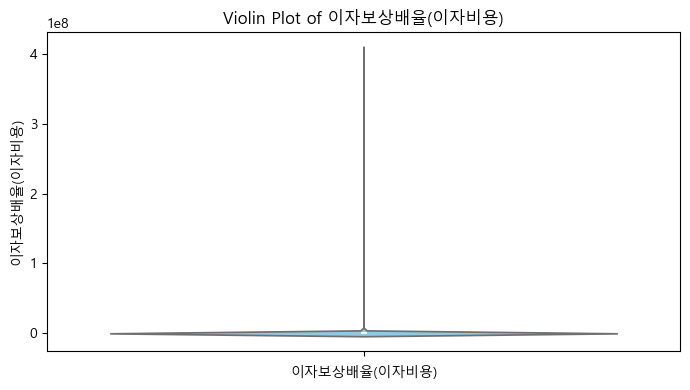

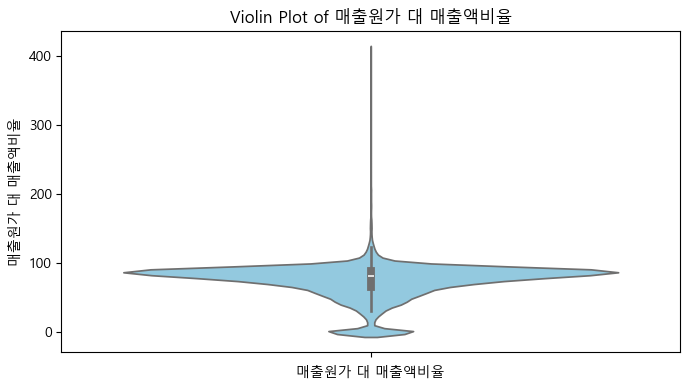

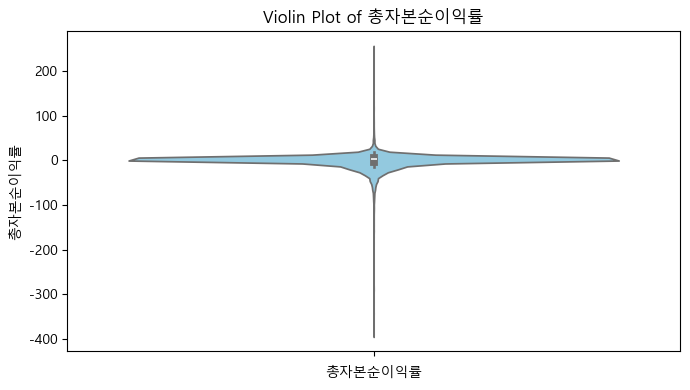

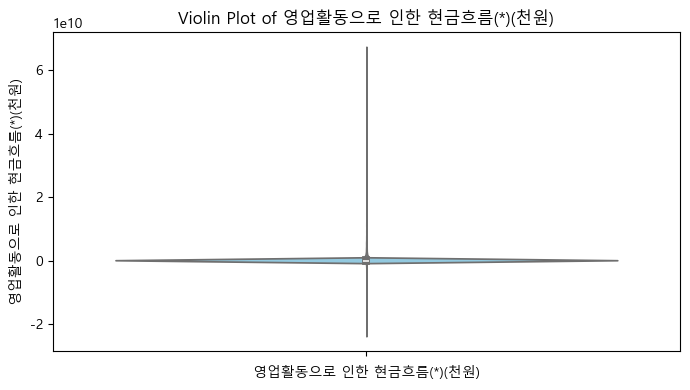

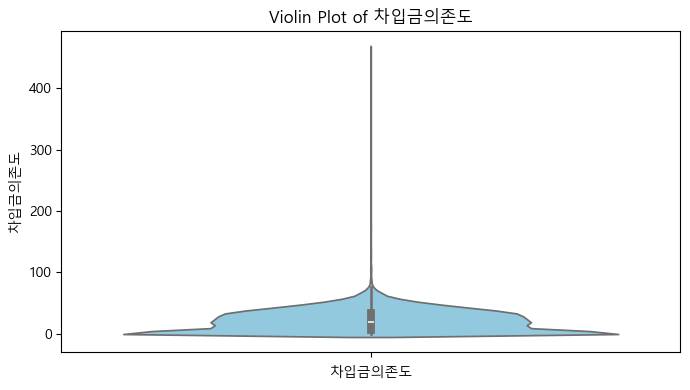

In [36]:
# 결측치 요약 
missing_summary = pd.DataFrame({
    '결측치 수': df.isnull().sum(),
    '결측 비율(%)': df.isnull().mean() * 100
})

# 기초통계량
numeric_summary = df.describe().T
numeric_summary['중앙값'] = df.median(numeric_only=True)

# 이상치 수 계산 (IQR 기준)
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_cond = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    iqr_outliers[col] = outlier_cond.sum()

outlier_summary = pd.DataFrame.from_dict(iqr_outliers, orient='index', columns=['이상치 수'])

# 통합 요약표
stats_summary = missing_summary.join(numeric_summary, how='inner')
stats_summary = stats_summary.join(outlier_summary, how='left')
stats_summary = stats_summary.sort_values(by='결측 비율(%)', ascending=False)

# 결과 출력
pd.set_option('display.max_rows', 100) 
display(stats_summary)

# 이상치 요약표
outlier_summary = outlier_summary.sort_values(by='이상치 수', ascending=False)
print("\n=== 이상치 요약 (IQR 기준) ===")
print(outlier_summary)

# 이상치 vioin plot 그리기
for col in numeric_columns[:5]:
    plt.figure(figsize=(7, 4))
    sns.violinplot(y=df[col], color='skyblue')
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## 05. y컬럼과 x컬럼 분리 및 VIF 확인
- VIF 계산(calculate_vif 함수 이용)

In [37]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)', '매출원가 대 매출액비율', '총자본순이익률',
       '영업활동으로 인한 현금흐름(*)(천원)', '차입금의존도', '당좌비율', '자기자본구성비율', '자기자본회전률',
       '총자본회전률', '정상영업이익증가율', '순이익증가율', '매출액증가율', 'x1', 'x2', 'x3', 'x4',
       'pcr', 'psr', 'ln(매출액)', 'ln(시가총액)', 'ln(기업업력)', '잉여현금흐름 비율', '영업이익률',
       '적자_누적_flag', '기업유동성위험_flag', '재무레버리지효과', '유동자산_비율', '비유동자산_비율',
       '자산_EBITDA비율', '유동부채_자본비율', '유동부채비율'],
      dtype='object')

In [38]:
filtered_cols = ['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)', '매출원가 대 매출액비율', '총자본순이익률',
       '영업활동으로 인한 현금흐름(*)(천원)', '차입금의존도', '당좌비율', '자기자본구성비율', '자기자본회전률',
       '총자본회전률', '정상영업이익증가율', '순이익증가율', '매출액증가율', 'x1', 'x2', 'x3', 'x4',
       'pcr', 'psr', 'ln(매출액)', 'ln(시가총액)', 'ln(기업업력)', '잉여현금흐름 비율', '영업이익률',
       '적자_누적_flag', '기업유동성위험_flag', '재무레버리지효과', '유동자산_비율', '비유동자산_비율',
       '자산_EBITDA비율', '유동부채_자본비율', '유동부채비율']

#### y컬럼과 x컬럼 분리

In [39]:
y_columns = '이자보상배율(이자비용)','영업활동으로 인한 현금흐름(*)(천원)'
X_columns_f = [col for col in filtered_cols if col not in y_columns]
X_columns = [col for col in numeric_columns if col not in y_columns]

#### VIF 계산 함수 정의

In [40]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)

In [41]:
calculate_vif(df[X_columns])

,Variable,VIF
16,ln(매출액),193.335047
10,x1,96.096827
11,x2,55.037250
15,psr,15.410131
25,비유동자산_비율,10.174692
24,유동자산_비율,9.803964
6,총자본회전률,5.075531
4,자기자본구성비율,4.012406
17,ln(시가총액),3.810468
20,영업이익률,3.157970


#### ln(매출액)은 중요한 변수라 생각 다음으로 vif가 높은 x1 제거

In [42]:
df.drop(columns=['x1'],inplace=True)

#### 다시 VIF 재계산

In [43]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

X_columns = [col for col in numeric_columns if col not in y_columns]

calculated_vif = calculate_vif(df[X_columns])
calculated_vif

,Variable,VIF
10,x2,10.376135
24,비유동자산_비율,10.167615
23,유동자산_비율,9.791950
15,ln(매출액),9.205598
14,psr,6.934523
6,총자본회전률,5.052892
4,자기자본구성비율,3.966095
16,ln(시가총액),3.559877
2,차입금의존도,3.117712
5,자기자본회전률,3.025073


#### 유동자산_비율과 비유동자산_비율은 서로 보완적인 개념이므로 비유동자산_비율 컬럼 제거

In [44]:
df.drop(columns=['비유동자산_비율'],inplace=True)

#### 다시 VIF 재계산

In [45]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

X_columns = [col for col in numeric_columns if col not in y_columns]

calculated_vif = calculate_vif(df[X_columns])
calculated_vif

,Variable,VIF
10,x2,10.049908
15,ln(매출액),8.953336
14,psr,6.928749
6,총자본회전률,4.991032
16,ln(시가총액),3.385849
4,자기자본구성비율,3.078762
5,자기자본회전률,3.012954
19,영업이익률,2.894614
2,차입금의존도,2.534167
1,총자본순이익률,2.144922


## 05. 상관관계 확인 및 컬럼들의 0 비율 확인
- 상관 행렬 이용

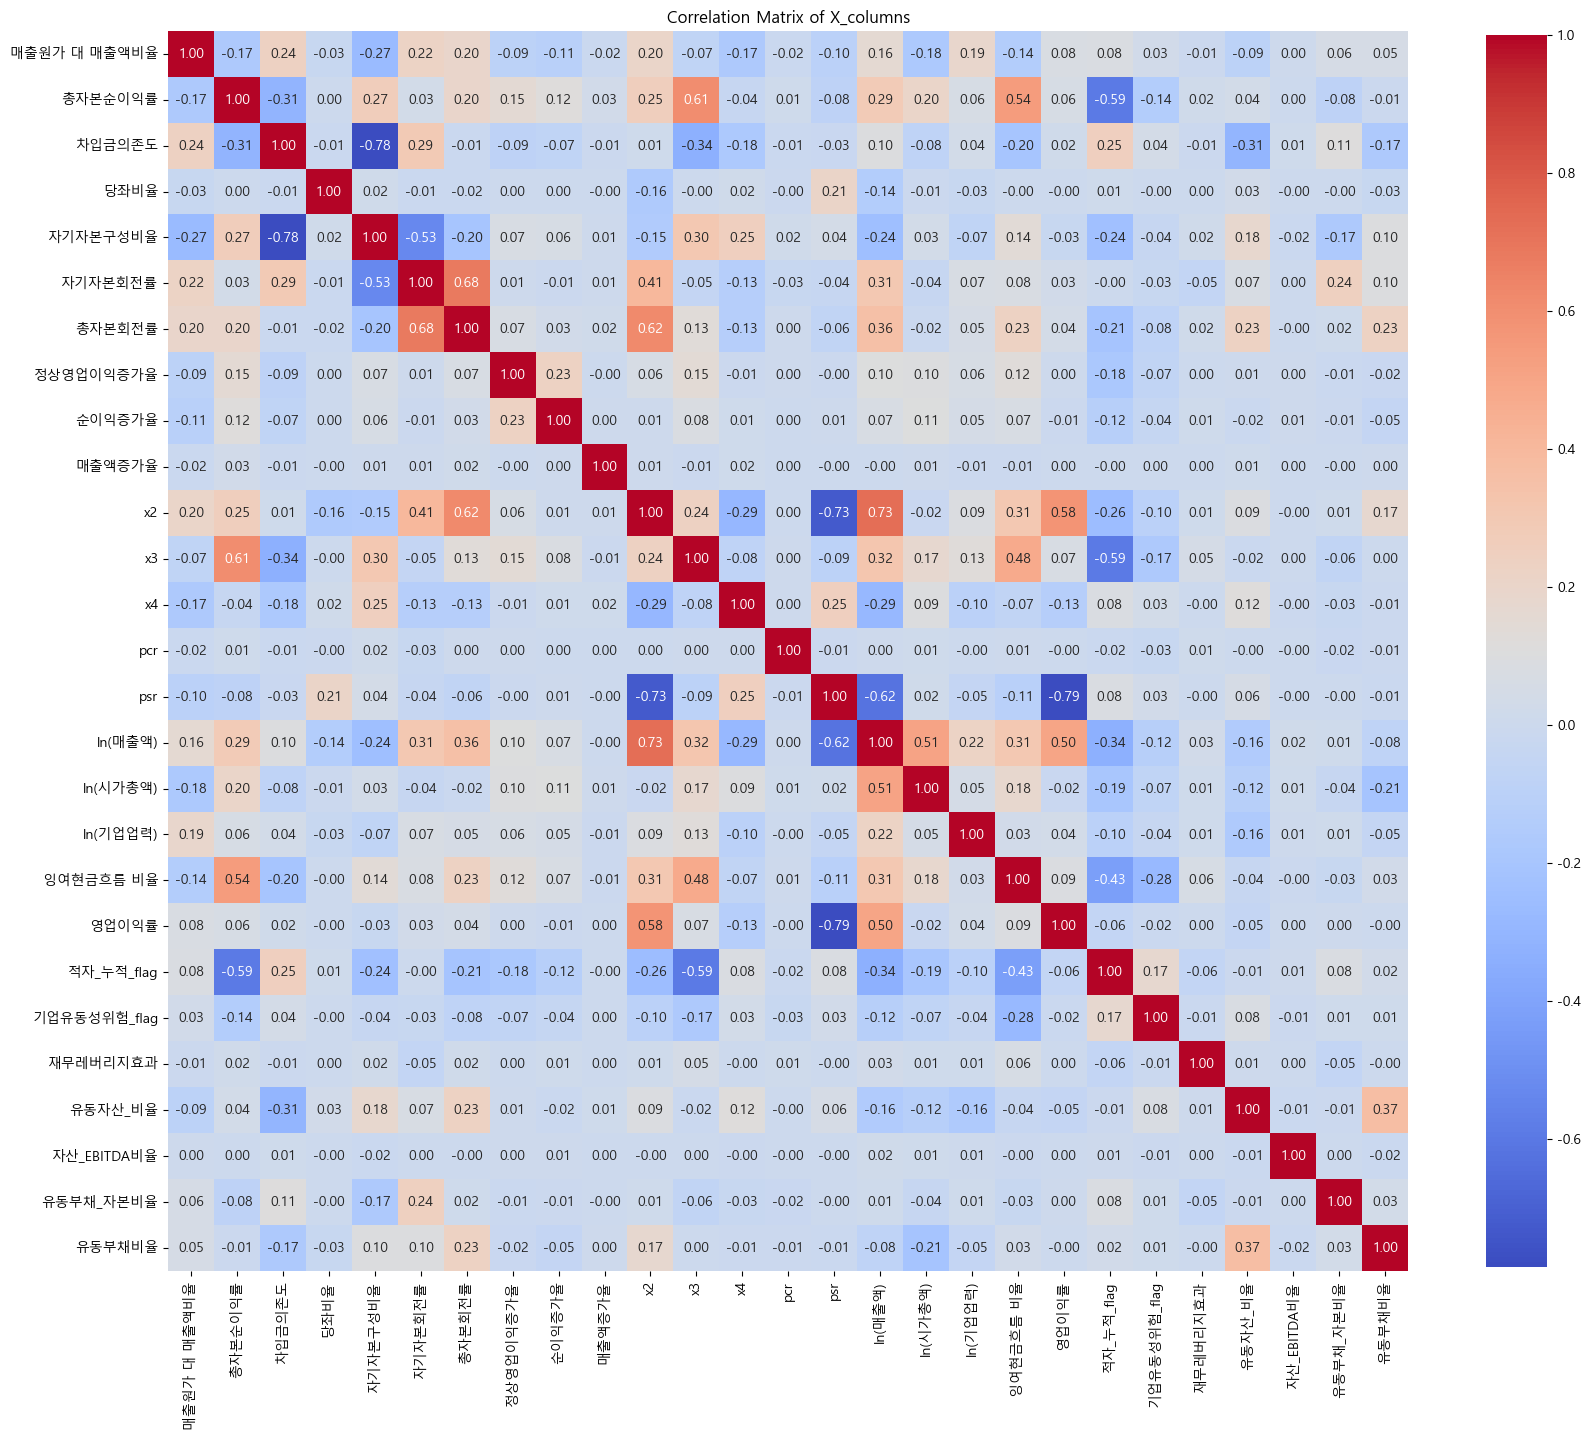

In [46]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

X_columns = [col for col in numeric_columns if col not in y_columns]

# df X_columns만 상관분석
correlation_matrix = df[X_columns].corr()
# 상관 행렬 시각화
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of X_columns')
plt.show()

#### 0 비율 확인

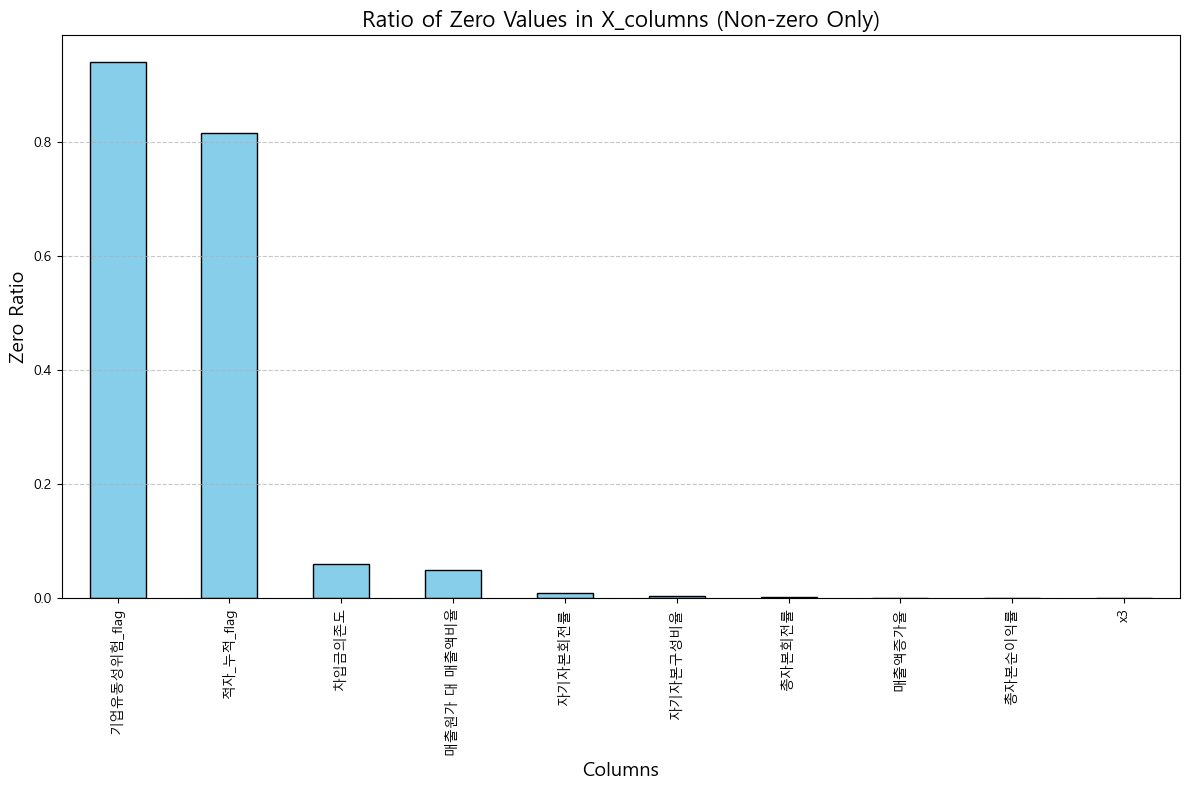

In [53]:
zero_ratio = (df[X_columns] == 0).sum() / len(df)

zero_ratio = zero_ratio[zero_ratio > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
zero_ratio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ratio of Zero Values in X_columns (Non-zero Only)', fontsize=16)
plt.ylabel('Zero Ratio', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 06. 데이터 저장
- df : 전처리후 원본 데이터셋

In [48]:
df.to_excel("data/전처리후데이터셋.xlsx",index=False)